In [3]:
import pandas as pd
# source https://www.kaggle.com/datasets/laotse/credit-risk-dataset
df = pd.read_csv('../data/raw/credit_risk_dataset.csv')

# Description des statistiques de base

In [5]:
shape = df.shape
print(f'Colonnes: {shape[1]}')
print(f'Lignes: {shape[0]}')

Colonnes: 12
Lignes: 32581


In [6]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [7]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


## Matrice de correlation - Variables quantitatives

person_age                   -0.021629
person_income                -0.144449
person_emp_length            -0.082489
loan_amnt                     0.105376
loan_int_rate                 0.335133
loan_status                   1.000000
loan_percent_income           0.379366
cb_person_cred_hist_length   -0.015529
dtype: float64


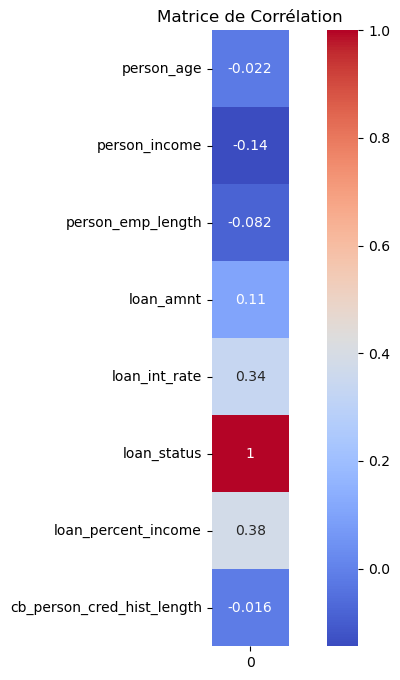

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sélectionner les colonnes numériques
colonnes_numeriques = df.select_dtypes(include=['int64', 'float64']).columns

# Créer une matrice de corrélation entre le statut du prêt et les autres colonnes numériques
matrice_correlation = df[colonnes_numeriques].corrwith(df['loan_status'])

# Afficher la matrice de corrélation
print(matrice_correlation)

# Tracer la matrice de corrélation sous forme de heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(matrice_correlation.to_frame(), annot=True, cmap='coolwarm', square=True)
plt.title('Matrice de Corrélation')
plt.show()

Bien que la variable person_home_ownership soit statistiquement significative (comme l’indiquent les faibles p-valeurs), le coefficient de détermination R² de 0,059 montre que ce modèle explique seulement 5,9 % de la variance dans la variable dépendante loan_status. Cela suggère que la propriété du logement a un faible pouvoir explicatif sur le statut du prêt. Les coefficients montrent que les individus qui possèdent leur logement (OWN) ont un statut de prêt légèrement inférieur par rapport à ceux avec une hypothèque, tandis que ceux qui louent (RENT) ou ont d’autres types de propriété (OTHER) ont des statuts de prêt légèrement plus élevés.

En résumé, même si l’effet est statistiquement significatif, d'autres variables non incluses dans ce modèle jouent probablement un rôle important dans la détermination du statut de prêt.

### Correlation entre loan_status et loan_intent

In [12]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('loan_status ~ C(loan_intent)', data=df).fit()
anova_table = sm.stats.anova_lm(model)

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            loan_status   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     105.8
Date:                Tue, 17 Sep 2024   Prob (F-statistic):          3.82e-111
Time:                        19:55:11   Log-Likelihood:                -17156.
No. Observations:               32581   AIC:                         3.432e+04
Df Residuals:                   32575   BIC:                         3.438e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Interc

Bien que les différentes catégories d’intention de prêt aient un effet statistiquement significatif sur le statut de prêt, l’effet global est faible (comme l'indique le R-carré de 1,6 %). Cela suggère que d’autres facteurs non inclus dans le modèle influencent fortement le statut de prê

### Correlation entre loan_status et loan_grade


In [15]:
model = ols('loan_status ~ C(loan_grade)', data=df).fit()
anova_table = sm.stats.anova_lm(model)

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            loan_status   R-squared:                       0.172
Model:                            OLS   Adj. R-squared:                  0.172
Method:                 Least Squares   F-statistic:                     1129.
Date:                Tue, 17 Sep 2024   Prob (F-statistic):               0.00
Time:                        19:55:12   Log-Likelihood:                -14341.
No. Observations:               32581   AIC:                         2.870e+04
Df Residuals:                   32574   BIC:                         2.875e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.0996      0

Les notes de prêt (loan_grade) sont des prédicteurs significatifs du statut de prêt, et l'effet de la note de prêt devient de plus en plus fort à mesure que la note augmente, avec un impact particulièrement important pour les notes D, E, F, et G. Toutefois, avec un R-carré de 17,2 %, cela indique que d'autres facteurs importants influencent également le statut de prêt, et qu'ils ne sont pas capturés par ce modèle.

# Pair Plot

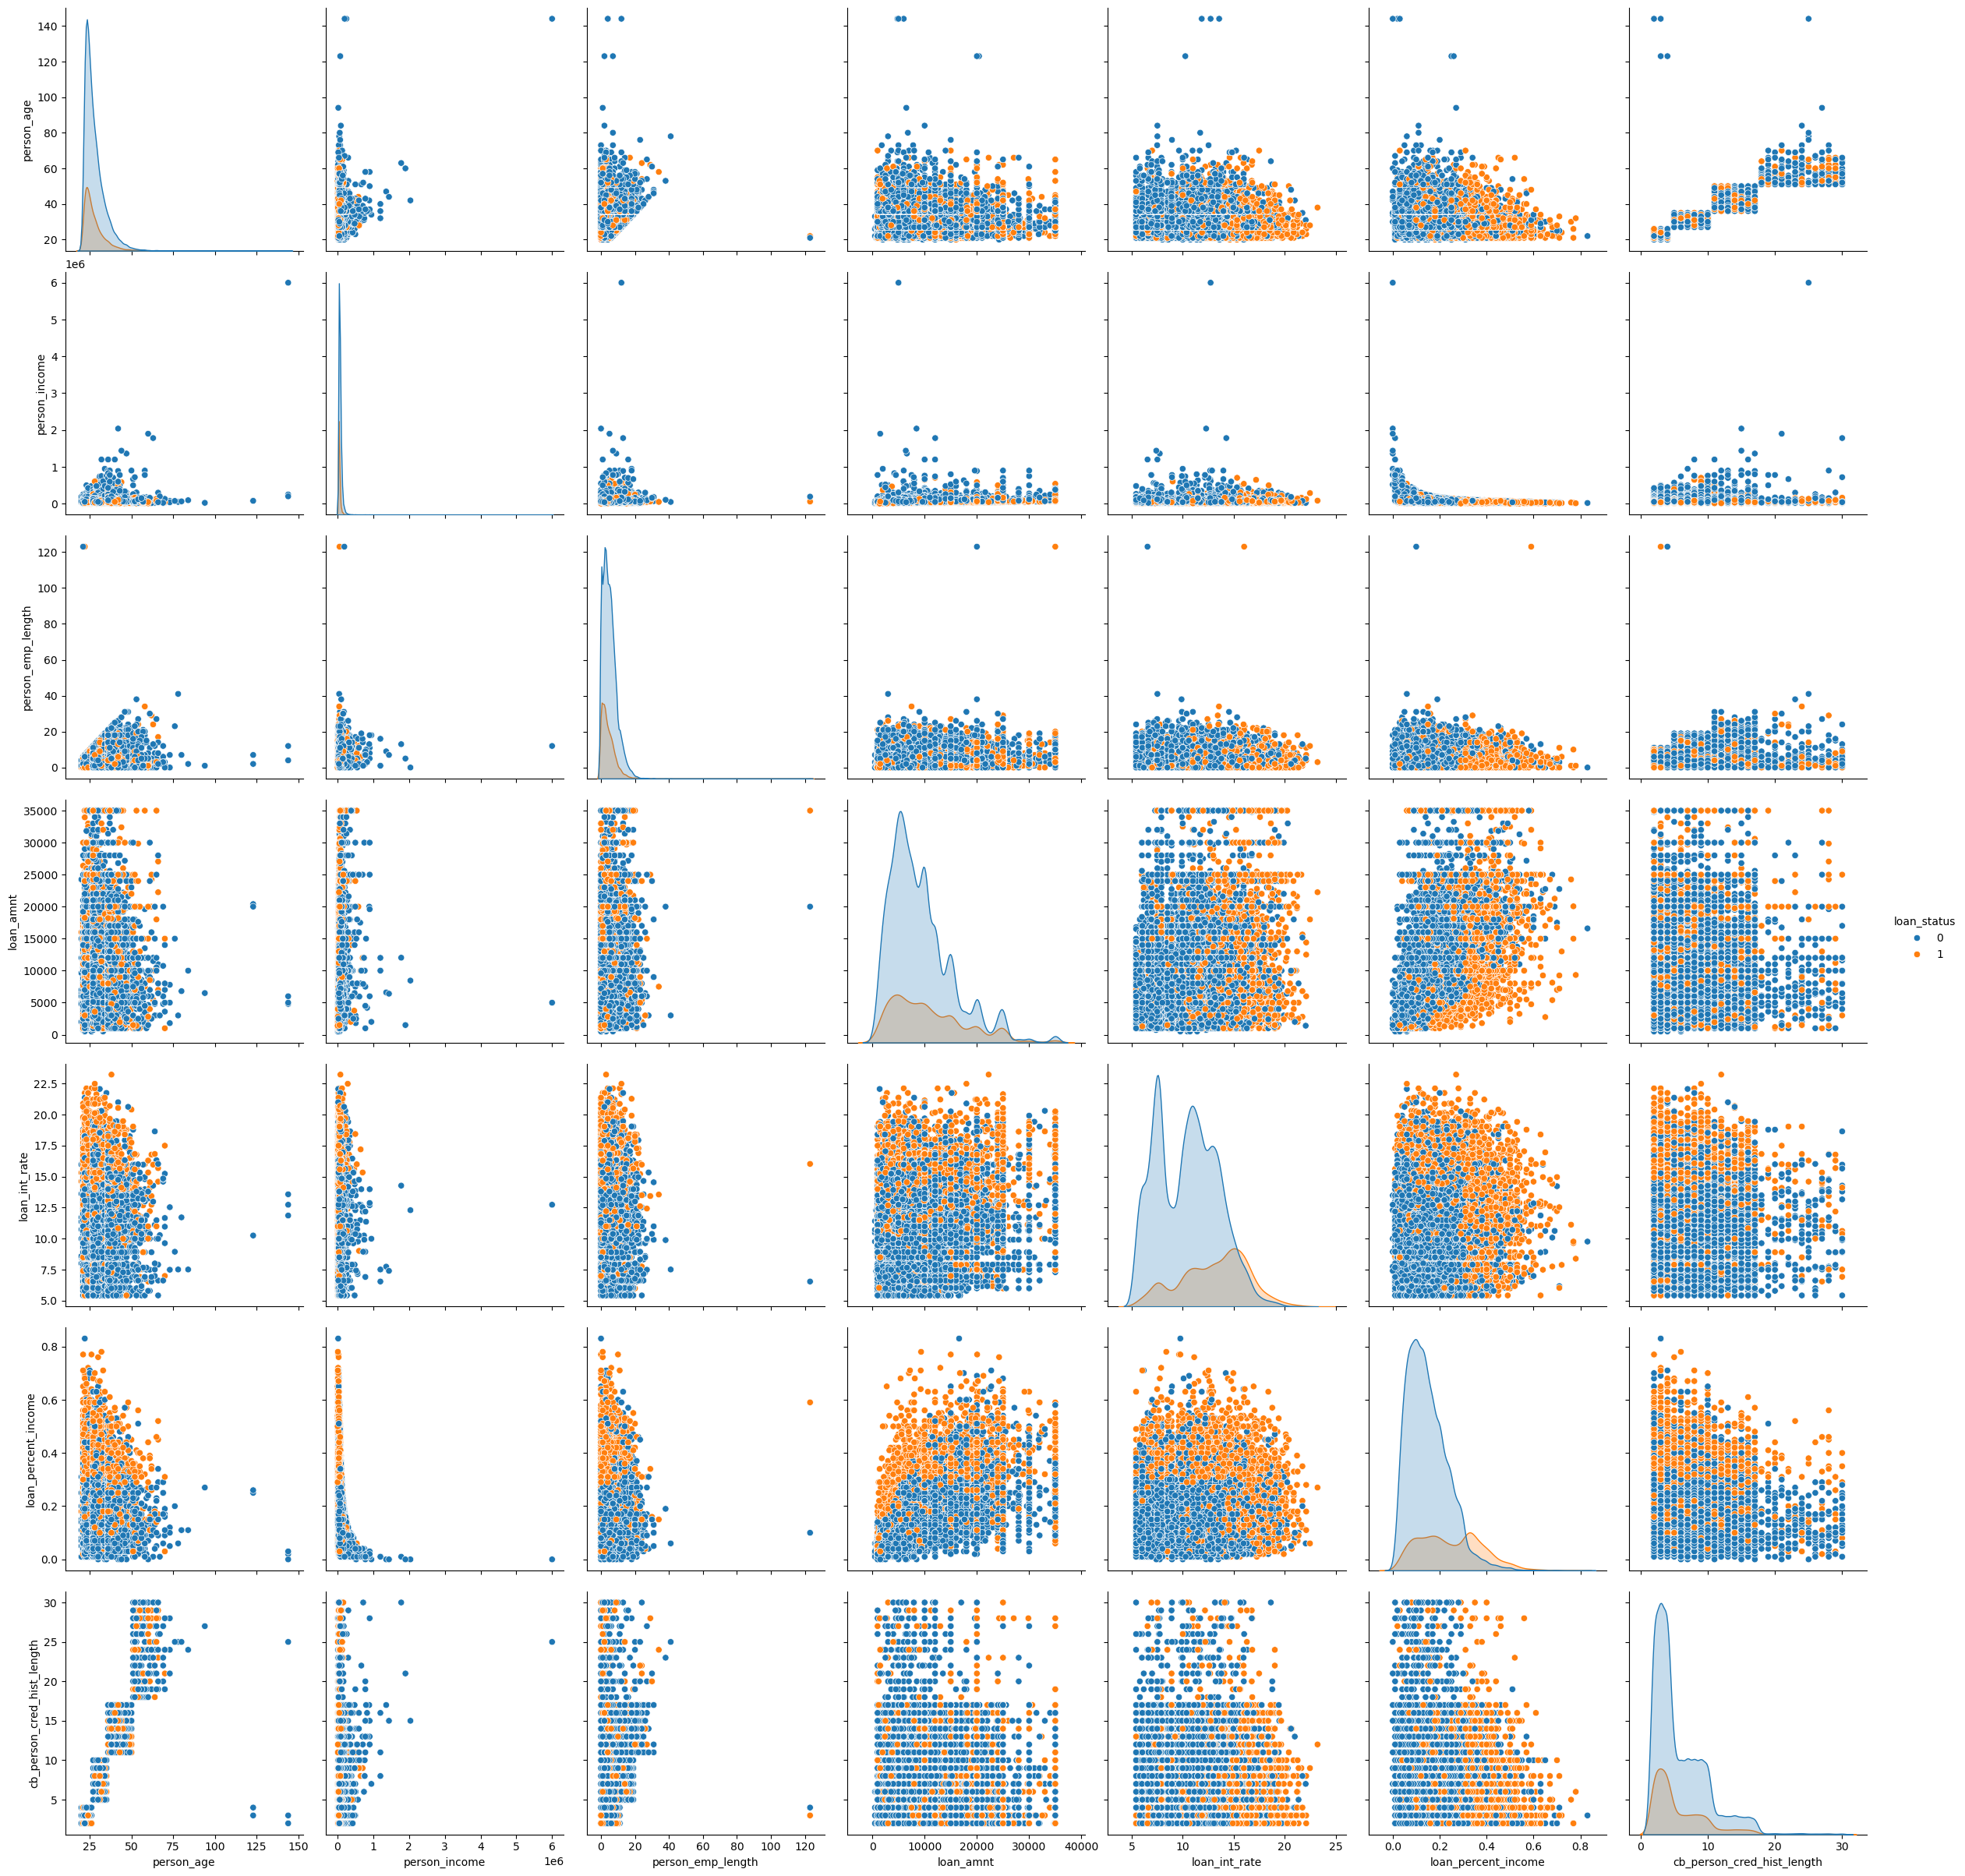

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df, hue='loan_status', height=3.5)

## Valeurs manquantes

In [20]:
# D'après la commande ci-dessous, nous pouvons voir que 
# les champs person_emp_length et loan_int_rate ont des valeurs manquantes
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB
None


In [21]:
df[df['person_emp_length'].isnull()]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
105,22,12600,MORTGAGE,NaN,PERSONAL,A,2000,5.42,1,0.16,N,4
222,24,185000,MORTGAGE,NaN,EDUCATION,B,35000,12.42,0,0.19,N,2
379,24,16800,MORTGAGE,NaN,DEBTCONSOLIDATION,A,3900,NaN,1,0.23,N,3
407,25,52000,RENT,NaN,PERSONAL,B,24000,10.74,1,0.46,N,2
408,22,17352,MORTGAGE,NaN,EDUCATION,C,2250,15.27,0,0.13,Y,3
...,...,...,...,...,...,...,...,...,...,...,...,...
32285,38,12000,OWN,NaN,EDUCATION,A,4800,7.29,1,0.40,N,12
32328,51,18408,RENT,NaN,PERSONAL,C,1000,14.65,1,0.05,Y,20
32360,70,39996,RENT,NaN,MEDICAL,C,3600,15.23,0,0.09,Y,19
32453,56,32400,RENT,NaN,MEDICAL,A,8575,7.51,0,0.26,N,18


In [22]:
df[df['loan_int_rate'].isnull()]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
39,23,71500,RENT,3.0,DEBTCONSOLIDATION,D,30000,NaN,1,0.42,N,4
50,24,78000,RENT,4.0,DEBTCONSOLIDATION,D,30000,NaN,1,0.38,Y,4
57,23,277000,OWN,3.0,PERSONAL,A,35000,NaN,0,0.13,N,4
59,24,12000,OWN,2.0,VENTURE,E,1750,NaN,0,0.15,Y,3
62,26,263000,MORTGAGE,0.0,EDUCATION,B,10000,NaN,1,0.04,N,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32547,53,4888,OWN,0.0,VENTURE,C,1400,NaN,1,0.29,Y,28
32552,65,45900,RENT,2.0,EDUCATION,C,10000,NaN,0,0.22,Y,19
32553,54,20000,RENT,2.0,MEDICAL,C,5000,NaN,0,0.25,N,28
32569,51,60000,MORTGAGE,1.0,PERSONAL,A,7500,NaN,0,0.13,N,23


## Distribuition 

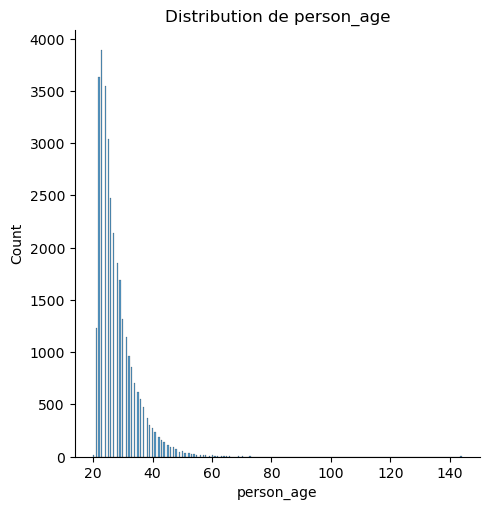

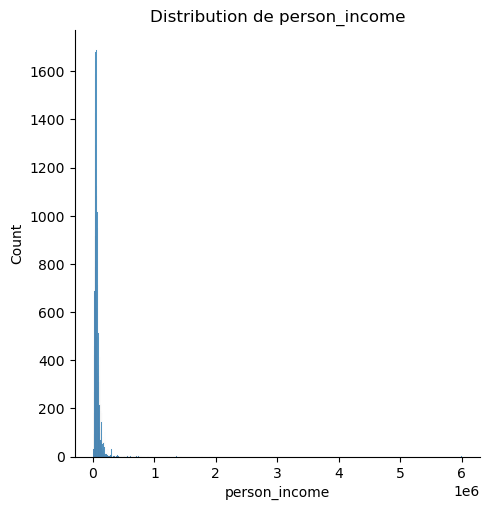

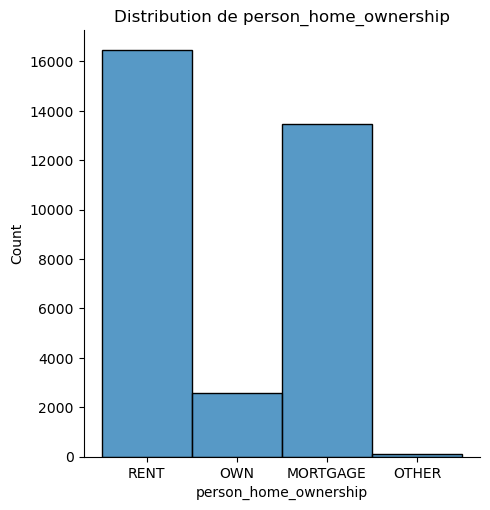

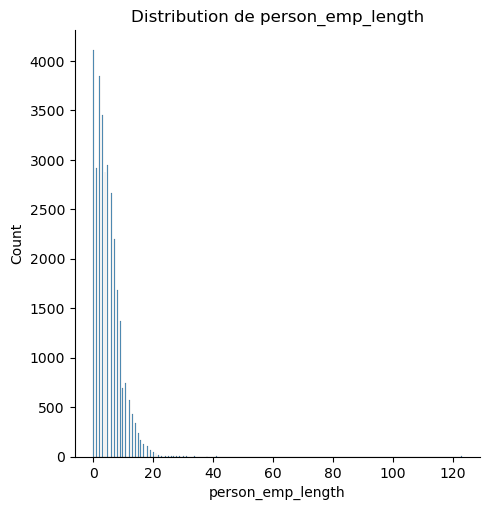

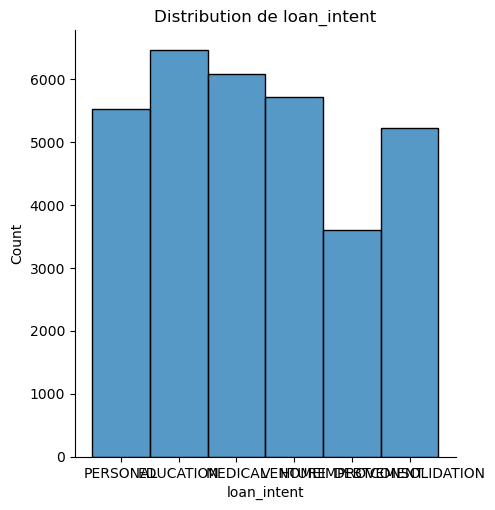

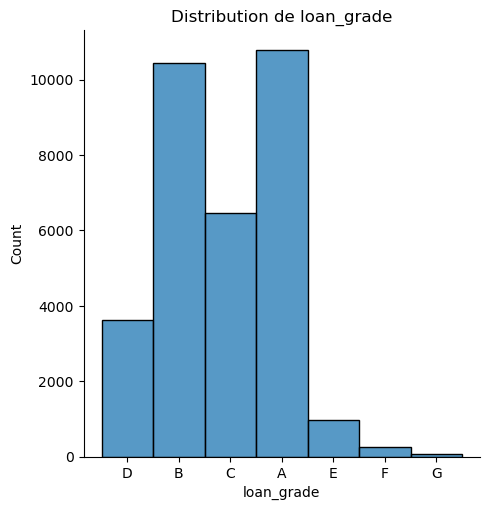

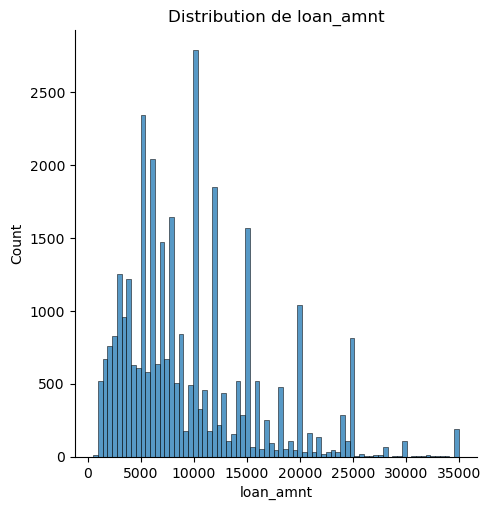

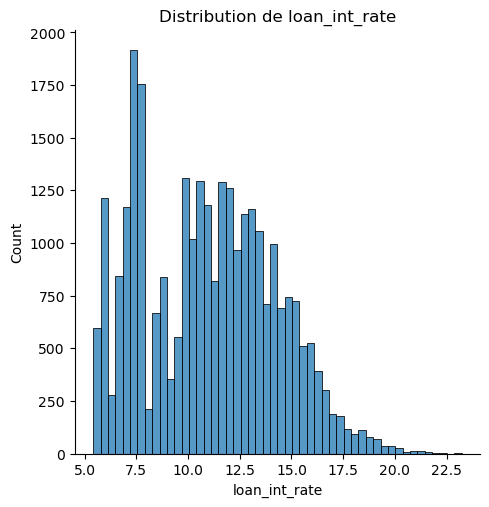

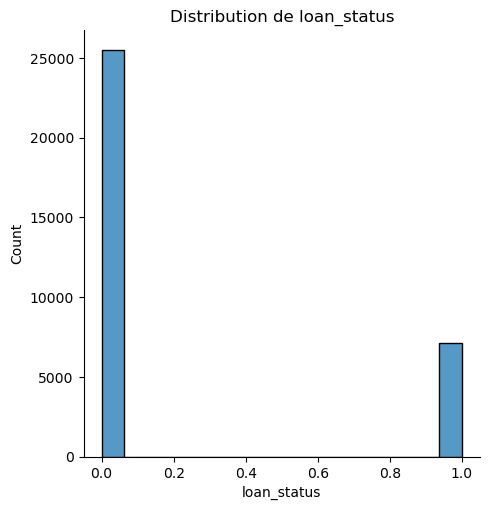

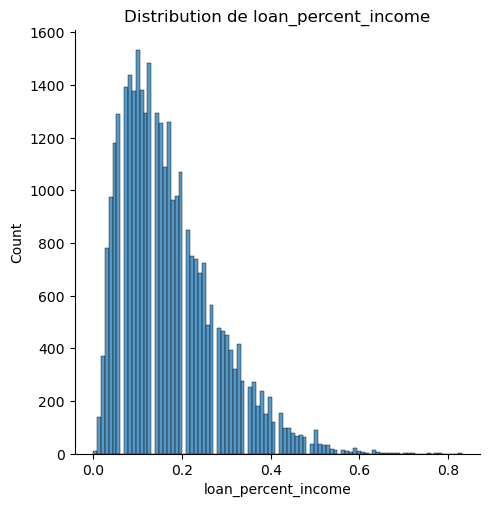

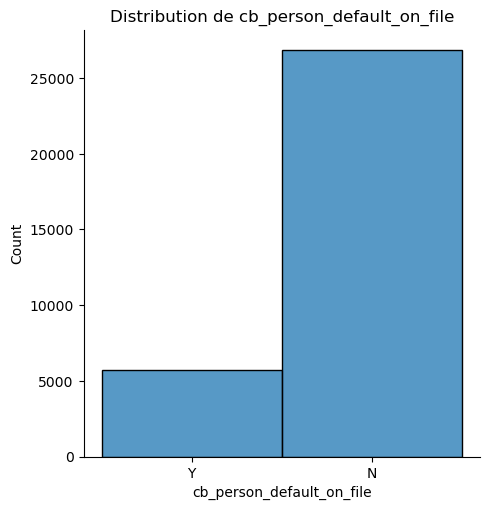

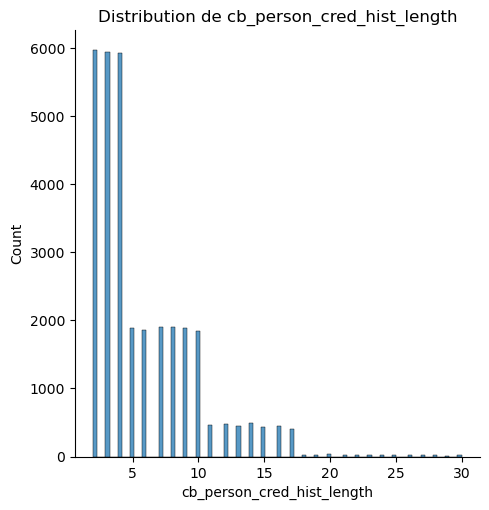

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in df.columns :
    sns.displot(df[col])
    plt.title(f'Distribution de {col}')
    plt.xlabel(col)
    plt.show()

## Boxplot - Valeurs aberrantes
Les graphiques ci-dessous montrent quelques valeurs aberrantes. Par exemple, certains enregistrements ont des valeurs supérieures à 80 ans dans le champ âge

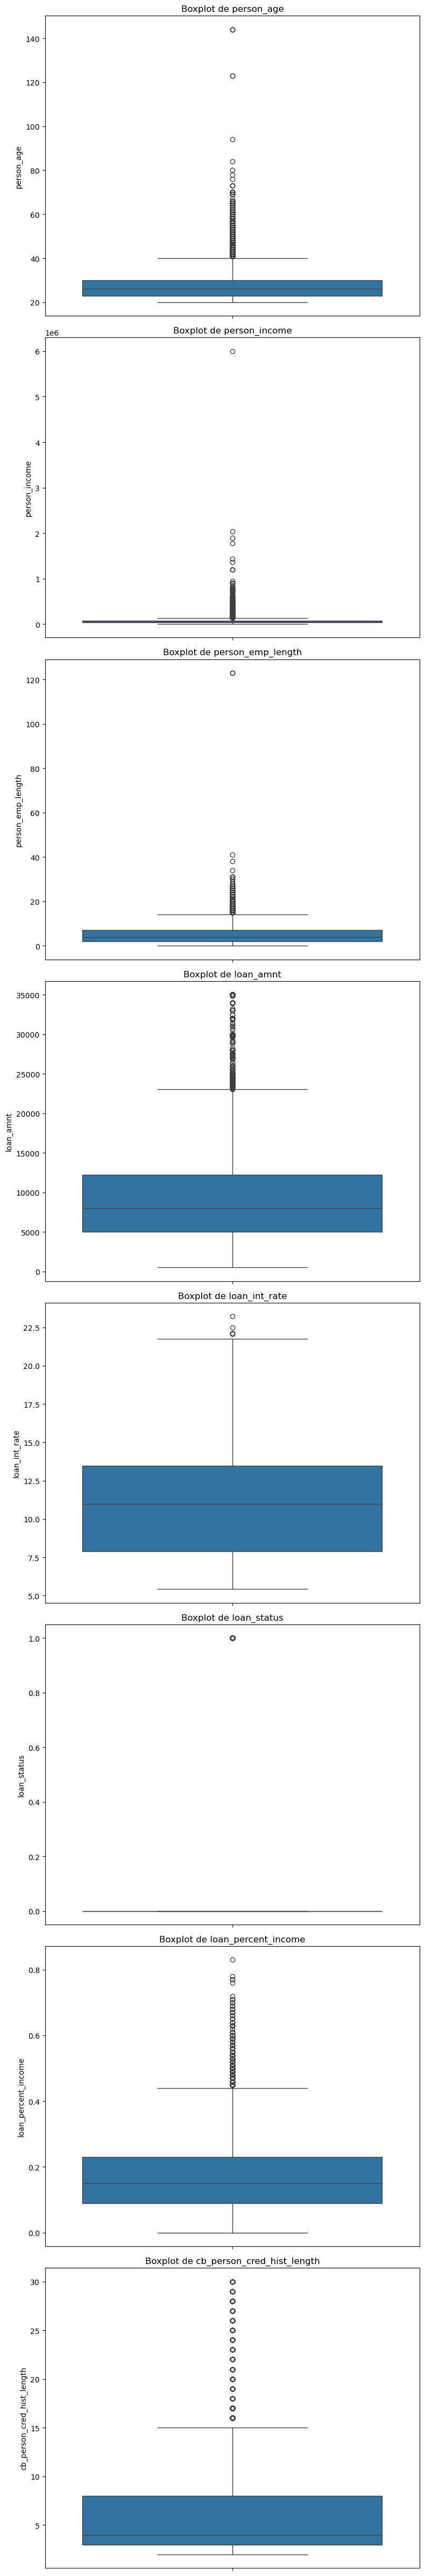

In [26]:

import seaborn as sns
import matplotlib.pyplot as plt

col_numeriques = df.select_dtypes(include=['int64', 'float64']).columns

fig, axs = plt.subplots(nrows=len(col_numeriques), figsize=(8, 6*len(col_numeriques)))
for i, col in enumerate(col_numeriques):
    sns.boxplot(data=df[col], ax=axs[i])
    axs[i].set_title(f'Boxplot de {col}')
plt.tight_layout()
plt.show()

In [48]:
df[df['person_emp_length'].notna()]


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26
